In [1]:
%matplotlib inline

import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.config import FIG_DIR, DATA_DIR

In [2]:
figure_data_file = os.path.join(FIG_DIR, 'fig_7_data.csv')
figure_name = os.path.join(FIG_DIR, 'paper_fig_7.png')

if not os.path.exists(figure_data_file):

    preference_rating_file = os.path.join(DATA_DIR, 'UserStudy2', 'preference_ratings.csv')
    df = pd.read_csv(preference_rating_file)
    selected_users = {6: 'User 1', 45: 'User 2', 37: 'User 3', 30: 'User 4'}
    df = df[df['user'].isin(selected_users)]
    df['Sample user'] = df['user'].map(selected_users)
    qn_model = {1: 'MixtureTW', 2: 'SASRec', 3: 'NMF', 4: 'Personal', 5: 'FPMC'}
    models = ['Personal','MixtureTW', 'NMF', 'FPMC', 'SASRec']
    df['Algorithm'] = df['qn'].map(qn_model)
    df['Algorithm'] = pd.Categorical(df['Algorithm'], categories=models, ordered=True)
    
    cols = ['Sample user', 'Algorithm', 'rating']
    df = df[cols].sort_values(['Sample user', 'Algorithm'])

    df.to_csv(figure_data_file, index=False)

# Bar plot of preference ratings for sample users

In [3]:
def plot_fig7(data, figure_name=figure_name, default_error_bar=False):    
    plt.rc('pdf', fonttype=42)
    sns.set(style="ticks")
    sns.set_context('paper', font_scale=1.3)
    plt.subplots(figsize=(7, 3))

    my_colors = dict(zip(['User 1', 'User 2', 'User 3', 'User 4'], 
                         ['lightgrey', 'darkgrey', 'grey', 'dimgrey'][::-1]))
    
    if default_error_bar:
        ax = sns.barplot(data=data, x='Algorithm', y='rating', hue='Sample user', palette=my_colors)
    else:
        capsize = .05
        ax = sns.barplot(data=data, x='Algorithm', y='rating', hue='Sample user', palette=my_colors, capsize=capsize)
        patches = ax.patches
        lines_per_err = 3
        for i, line in enumerate(ax.get_lines()):
            newcolor = patches[i // lines_per_err].get_facecolor()
            line.set_color(newcolor)

    ax.set_ylim(ymin=-0.1, ymax = 5)
    ax.grid(ls="dotted")
    ax.set_ylabel('Preference ratings, $r^p_i(v_j)$') #, $v_j$ in $RecList_{algo}(i,10)$
    ax.set_xlabel('') # 'Almorithms'
    ax.legend(title="Sample user", loc='center right', bbox_to_anchor=(1.25, 0.5))

    sns.despine(offset=10, trim=True) 
    plt.tight_layout()
    plt.savefig(figure_name, dpi=200, transparent=False, bbox_inches='tight', pad_inches=0.0)
    plt.show()

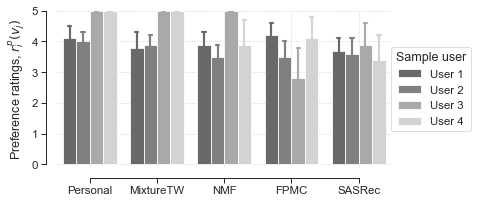

In [4]:
data = pd.read_csv(figure_data_file)
plot_fig7(data)